## Set up

In [2]:
from pymongo import MongoClient
from pprint import pprint

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

import pickle
import json


In [3]:
from bson.objectid import ObjectId

In [4]:
# stemming
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Jocelyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# This creates a client that uses the default port on localhost.
# If connecting to AWS, you need a connection string.
# Can do the same thing with MongoClient("mongodb://localhost:27017")
# client = MongoClient()
client = MongoClient("mongodb://localhost:27017")

In [6]:
# Makes it look similar to shell mongo
db = client.amazon_lb

In [7]:
db.list_collection_names()

['product_reviews',
 'skin_care_face_rev_agg',
 'product_metadata',
 'skin_care_face_reviews',
 'skin_care_face_prod_rev',
 'skin_care_face_products']

In [8]:
# cursor = db.skin_care_face_products.find()
# products = list(cursor)
# products[0]

## Products

In [9]:
cursor = db.skin_care_face_prod_rev.find()
products = list(cursor)
products[0]

{'_id': ObjectId('5dc881769f9b98109203bca6'),
 'title': 'DERMAdoctor Calm, Cool & Corrected anti-redness tranquility cream - 1.7 Oz',
 'also_buy': ['B019EKOK6G',
  'B01EM44IEI',
  'B0186FLPUE',
  'B00RORUNQI',
  'B006TD38ZG',
  'B01EM4D85I',
  'B002VM7ILE',
  'B0000ZREXG',
  'B000OMPQ76',
  'B00VHJ13EA',
  'B00E1KLNW4',
  'B01EM45YNW',
  'B00RORUL6U',
  'B000FJU4HK',
  'B00VHJ0ZUS'],
 'image': ['https://images-na.ssl-images-amazon.com/images/I/41sTOlcsmjL._SX50_SY65_CR,0,0,50,65_.jpg',
  'https://images-na.ssl-images-amazon.com/images/I/81K-8p2lItL.SX50_SY65_CR,0,0,50,65_PKmb-play-button-overlay-thumb_.jpg'],
 'rank': '186,829inBeautyamp;PersonalCare(',
 'also_view': ['B01ETQBD6U',
  'B019EKOK6G',
  'B01EM45YNW',
  'B0186FLPUE',
  'B07B8BN8H6',
  'B000FJU4HK',
  'B01EM44IEI',
  'B00RORUL6U',
  'B01FO1IT02',
  'B001FXOCT6',
  'B01EM45E4G',
  'B00RORUNQI',
  'B000Z61SSM',
  'B00VHJ13EA',
  'B002CML1XE',
  'B0000ZREXG',
  'B07B7HVPCB',
  'B071JS38YF',
  'B00ZPWR0N8',
  'B00E1KLNW4'],
 'de

In [9]:
len(products[0]['reviews'])

34

In [10]:
# create dataframe from reviews
df = pd.DataFrame()

df['id'] = [prod['_id'] for prod in products]
df['asin'] = [prod['asin'] for prod in products]
df['product'] = [prod['title'] for prod in products]
df['overall_rating'] = [prod['rating'] for prod in products]
df['review_count'] = [len(prod['reviews']) for prod in products]
df['description'] = [prod['description'] for prod in products]
df['category2'] = [prod['category2'] for prod in products]
df['category3'] = [prod['category3'] for prod in products]
# df['category2'] = [rev['category2'] for rev in reviews]

# df['rating'] = [rev['overall'] for rev in reviews]
# df['review_text'] = [val['reviewText'] for val in reviews]

df.head(5)
df.shape

(2241, 8)

In [11]:
df['overall_rating']=[re.sub('\\n','99',x) for x in df['overall_rating']]

In [12]:
df['overall_rating'] = [float(x) for x in df['overall_rating']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 8 columns):
id                2241 non-null object
asin              2241 non-null object
product           2241 non-null object
overall_rating    2241 non-null float64
review_count      2241 non-null int64
description       2241 non-null object
category2         2241 non-null object
category3         2241 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 140.2+ KB


In [14]:
df1 = df.loc[df['overall_rating'] <= 5]
df1.shape

(2233, 8)

In [15]:
# needs name clean-up
test = db.skin_care_face_prod_rev.find({'_id':ObjectId('5dc881779f9b98109203c4c7')},)
list(test)

[{'_id': ObjectId('5dc881779f9b98109203c4c7'),
  'description': 'A refreshing, hydrating mist to use anywhere anytime. Simply formulated with fragrant Herbal Extracts and Rosewater for a pleasant, pick me up for dehydrated, tight and uncomfortable skin. Spray your day and night creams for a boost of hydration or use it to set make-up or spray on dry hair throughout the day. Safe for all skin types. Gentle, non-irritating. Ingredients-Aqua (Water, Eau), Propylene Glycol, Aloe Barbadensis Leaf Juice, Rosa Canina Extract, Thymus Vulgaris (Thyme) Leaf Extract, Fucus Vesiculosus Extract, Gardenia Florida Fruit Extract, Caprylyl Glycol, Hexylene Glycol, Polysorbate 20, Parfum (Fragrance), Phenoxyethanol, Sodium Chloride, Citronellol, Geraniol, CI 17200 (Red 33), CI 42090 (Blue 1)',
  'title': 'Mario Badescu Facial Spray with Aloe, Herbs and Rosewater, 8 oz.',
  'also_buy': ['B0017SWIU4',
   'B07BSV1T35',
   'B0014P8L9W',
   'B07DYDD49N',
   'B01K2UMMI0',
   'B01M4MCUAF',
   'B00016XJ4M',
   

In [16]:
df1.head(5)

,id,asin,product,overall_rating,review_count,description,category2,category3
0,5dc881769f9b98109203bca6,B0000Y3NO6,"DERMAdoctor Calm, Cool & Corrected anti-rednes...",3.9,34,,Treatments & Masks,Not listed
1,5dc881769f9b98109203bca9,B00012C5RS,"DERMAdoctor Picture Porefect Pore Minimizer, 1...",3.2,27,,"Exfoliators, Polishes & Scrubs",Exfoliators
2,5dc881769f9b98109203bcb9,B0001EKTTC,"Glytone Rejuvenating Mask, 3 oz.",4.3,26,Promotes a supple texture and bright tone Glyt...,Treatments & Masks,Masks
3,5dc881769f9b98109203bcc4,B0001EL5Q8,"PCA SKIN Rejuvenating Serum, 1 fl. oz.",3.6,55,Formulated with grape fruit stem cell extract ...,Treatments & Masks,Serums
4,5dc881769f9b98109203bcc5,B0001EL5JA,PCA SKIN Protecting Hydrator Broad Spectrum S...,4.3,41,This non-oily daily hydrator and sunscreen pr...,Creams & Moisturizers,Face Moisturizers


In [17]:
len(df1[df1['review_count']>1000])

2

In [18]:
df1.describe()

,overall_rating,review_count
count,2233.000000,2233.000000
mean,3.989118,36.287058
std,0.735324,147.992221
min,1.000000,1.000000
25%,3.600000,3.000000
50%,4.000000,10.000000
75%,4.500000,32.000000
max,5.000000,6138.000000


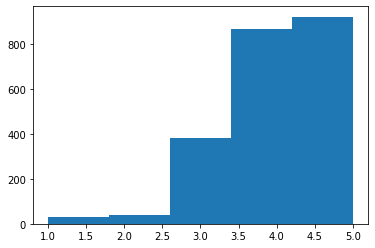

In [19]:
plt.hist(df1['overall_rating'],bins=5);

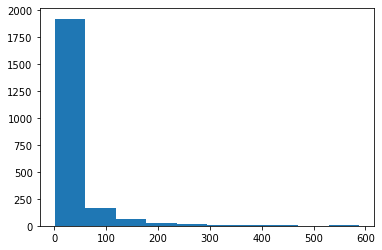

In [20]:
hist1 = df1['review_count'].sort_values()
plt.hist(hist1[0:-3],bins=10);

In [21]:
a = df1.groupby(df1['category2'])['overall_rating'].agg(('count','mean'))
a

,count,mean
category2,,
Cleansers,441,4.080499
Creams & Moisturizers,764,3.966099
"Exfoliators, Polishes & Scrubs",87,4.059770
Not listed,40,4.115000
Sets & Kits,88,3.944318
Toners & Astringents,126,4.060317
Treatments & Masks,687,3.932460


In [22]:
a1 = df1.groupby(df1['category2']).agg({'overall_rating':('count','mean'),'review_count':'mean'})
a1

overall_rating           review_count
                                        count      mean         mean
category2                                                           
Cleansers                                 441  4.080499    47.394558
Creams & Moisturizers                     764  3.966099    40.171466
Exfoliators, Polishes & Scrubs             87  4.059770    24.758621
Not listed                                 40  4.115000    69.025000
Sets & Kits                                88  3.944318    15.784091
Toners & Astringents                      126  4.060317    34.984127
Treatments & Masks                        687  3.932460    27.256186

In [23]:
b = df1.groupby(df1['category3']).agg({'overall_rating':('count','mean'),'review_count':'mean'})
b

overall_rating           review_count
                           count      mean         mean
category3                                              
Acids & Peels                 48  3.925000    32.708333
Exfoliators                   27  4.051852    28.777778
Face Moisturizers            230  4.023043    39.378261
Face Oil                      27  4.103704    23.777778
Gels                          87  4.154023    57.655172
Masks                        221  4.045249    19.678733
Night Creams                  76  3.840789    33.631579
Not listed                  1054  3.983871    31.040797
Other                         46  3.776087   178.413043
Scrubs                        58  4.041379    20.482759
Serums                       250  3.888400    32.836000
Washes                       109  4.103670    61.844037

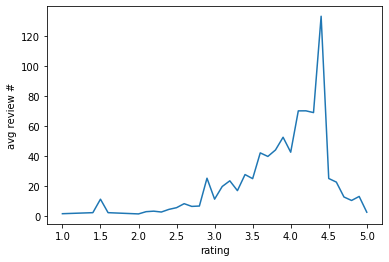

In [24]:
c = df1.groupby(df1['overall_rating']).agg({'review_count':('count','mean')})
c
plt.plot(c.index,c.review_count['mean'])
plt.xlabel('rating')
plt.ylabel('avg review #');

In [25]:
# save out link_list
with open('pickles/product_list.pickle', 'wb') as to_write:
    pickle.dump(df1, to_write)

## Reviews

#### Individual products

In [26]:
all_reviews = pd.DataFrame(columns=['asin','reviewer_id','review_id','rating','review_text'])

for prod in products:
    df = pd.DataFrame()
    df['asin'] = [rev['asin'] for rev in prod['reviews']]
    df['reviewer_id'] = [rev['reviewerID'] for rev in prod['reviews']]
    df['review_id'] = [rev['_id'] for rev in prod['reviews']]
    df['rating'] = [rev['overall'] for rev in prod['reviews']]
    df['review_text'] = [rev['reviewText'] for rev in prod['reviews']]
    all_reviews = pd.concat([all_reviews,df],axis=0,ignore_index=True)

In [27]:
print(len(all_reviews))
all_reviews.head(2)

81038


,asin,reviewer_id,review_id,rating,review_text
0,B0000Y3NO6,A3AAWP3AWC4UR1,5dc881afaf3db5220c9582ee,2.0,I gave it a shot for a while until the small b...
1,B0000Y3NO6,A2DKQ5CLJ2KWM3,5dc881afaf3db5220c9582ef,5.0,After trying all the drugstore rosacea product...


In [33]:
# save out review_list
with open('pickles/review_list.pickle', 'wb') as to_write:
    pickle.dump(all_reviews, to_write)

#### Reviews by product

In [29]:
# dataframe will all review text merged together by product
for prod in products:
    prod['all_review_text'] = [''.join(rev['reviewText']) for rev in prod['reviews']]
    prod['all_review_text'] = ''.join(prod['all_review_text'])

In [30]:
# Turn into review text
all_products = pd.DataFrame(columns=['asin','title','all_review_text'])

all_products['asin'] = [prod['asin'] for prod in products]
all_products['title'] = [prod['title'] for prod in products]
all_products['all_review_text'] = [prod['all_review_text'] for prod in products]

In [31]:
all_products.shape
all_products.head(5)

,asin,title,all_review_text
0,B0000Y3NO6,"DERMAdoctor Calm, Cool & Corrected anti-rednes...",I gave it a shot for a while until the small b...
1,B00012C5RS,"DERMAdoctor Picture Porefect Pore Minimizer, 1...","I haven't splurged on a full-size bottle yet, ..."
2,B0001EKTTC,"Glytone Rejuvenating Mask, 3 oz.",Great product . Gets the job done. Leaves your...
3,B0001EL5Q8,"PCA SKIN Rejuvenating Serum, 1 fl. oz.",I was very happy with the promptness with whic...
4,B0001EL5JA,PCA SKIN Protecting Hydrator Broad Spectrum S...,I bought the Hydrator with SPF after having a ...


In [32]:
# save out all_review_list
with open('pickles/all_review_list.pickle', 'wb') as to_write:
    pickle.dump(all_products, to_write)

In [18]:
# products['asin']=='B0019V5HI4'
test = db.skin_care_face_prod_rev.find({'asin':'B002TIR3YC'},)
list(test)

[{'_id': ObjectId('5dc881779f9b98109203c945'),
  'description': 'The perfect cleanser for oily skin types. Cleanses while helping to control the spread of bacteria. Guinot has consistently led the charge in everything from game-changing technology and techniques in skincare. Guinots meticulously honed collections of treatments and products are carried in top salons and spas.',
  'title': 'Guinot Microbiotic Cleansing Foam, 5.07 Fl oz',
  'also_buy': ['B000RTTVGS',
   'B0009OMOYW',
   'B00LSWBYZO',
   'B0029VAUA8',
   'B00SR8ZSPO',
   'B00EXW797S',
   'B002LTCSJO',
   'B004Q64KX2',
   'B00KG6CC0Y',
   'B00521FTM6',
   'B0182C6JCK',
   'B001246MNC',
   'B00DTRL7K8',
   'B00H59AA2W',
   'B01KP6C6PU',
   'B00N47FI5I',
   'B000BR4C6U',
   'B0016QYRU6',
   'B007HU7FA4',
   'B0051XV2M6',
   'B001B1OVFM',
   'B00N47E71E',
   'B00J8KH722',
   'B0012KRPTG',
   'B00HUOKT4Q',
   'B00N47DSJQ',
   'B00465OJVG',
   'B000Y1MPN0',
   'B004WPHHXW',
   'B00PB4ADDO',
   'B0009OMOV0',
   'B00GUGGX5Y',
   '